In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import sys
import pandas as pd

import pickle
import glob
import re
import yaml
import torch
import json

In [83]:
import glob

# "/checkpoint/yuandong/outputs/2019-08-08_12-16-38"

roots = ["/checkpoint/yuandong/outputs/2019-08-08_21-35-42", "/checkpoint/yuandong/outputs/2019-08-08_21-30-30"]

data = []

def convert_to_cpu(stats):
    if isinstance(stats, list):
        return [ convert_to_cpu(s) for s in stats ]
    elif isinstance(stats, dict):
        return { k : convert_to_cpu(v) for k, v in stats.items() }
    elif isinstance(stats, torch.Tensor):
        return stats.cpu()
    else:
        return stats
    
for root in roots:
    for sub_folder in glob.glob(os.path.join(root, "*")):
        print(sub_folder)
        path = os.path.join(root, sub_folder)
        args = yaml.load(open(os.path.join(path, "config.yaml"), "r"))
        stats = torch.load(os.path.join(path, "stats.pickle"))
        stats = convert_to_cpu(stats)
        data.append(dict(args=args,stats=stats))


/checkpoint/yuandong/outputs/2019-08-08_21-35-42/7_16597431
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/34_16597432
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/11_16597433
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/18_16597434
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/35_16597420
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/38_16597424
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/33_16597435
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/1_16597444
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/13_16597451
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/23_16597443
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/20_16597428
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/10_16597419
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/19_16597453
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/4_16597455
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/27_16597450
/checkpoint/yuandong/outputs/2019-08-08_21-35-42/40_16597452
/checkpoint/yuandong/output

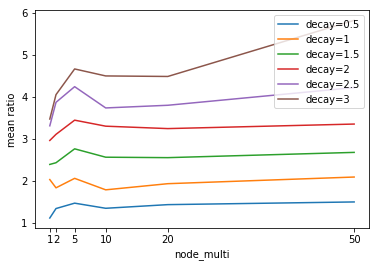

([<matplotlib.axis.XTick at 0x7facdf2897b8>,
 <a list of 6 Text xticklabel objects>)

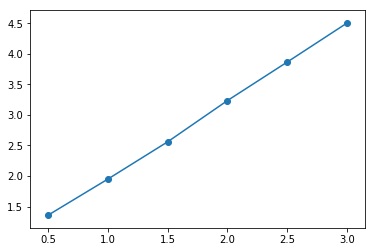

In [105]:
from collections import defaultdict 

decays = [0.5, 1, 1.5, 2, 2.5, 3]
mean_ratio = []

for decay in decays:
    multi2ratio = defaultdict(lambda : [0, 0, 0, 0])

    for d in data:
        multi = d["args"]["multi"]
        if d["args"]["teacher_strength_decay"] != decay:
            continue

        for seed, stat in d["stats"].items():
            counts = (stat[-1]["corr_train"] > 0.9).sum(dim=1).float()
            multi2ratio[multi][0] += counts[0].item()
            multi2ratio[multi][1] += counts[1].item()
            multi2ratio[multi][2] += counts[2].item()
            multi2ratio[multi][3] += 1

    x = []
    y = []
    for k in sorted(multi2ratio.keys()):
        v = multi2ratio[k]
        if k == 100:
            continue
        ratio = v[0] / v[1]
        x.append(k)
        y.append(ratio)

        #if v[1] > 0:
        #    print(f"{k}: 1/2: {v[0]}/{v[1]} ({v[0]/v[1]}), 2/3: {v[1]}/{v[2]} ({v[1] / v[2]})")
    
    plt.plot(x, y, label=f"decay={decay}")
    mean_ratio.append(sum(y) / len(y))
plt.xticks(x)
plt.legend()
plt.xlabel('node_multi')
plt.ylabel('mean ratio')
plt.show()

plt.plot(decays, mean_ratio)
plt.scatter(decays, mean_ratio)
plt.xticks(decays)

In [82]:
d["args"]

{'N': 10000,
 'bias': -0.1,
 'c': 50,
 'd': 30,
 'data_std': 1.5,
 'lr': 0.01,
 'm': 10,
 'multi': 100,
 'no_bias': False,
 'no_normalize': False,
 'num_iter': 30000,
 'print_iter': 1000,
 'seed': 4,
 'teacher_different_weights_strength': True,
 'use_sgd': False}